<a href="https://colab.research.google.com/github/Ben-Sicat/ml-dl/blob/master/imagre%20processing/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load themnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape,"x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,) x_test shape: (10000, 28, 28) y_test shape: (10000,)


In [18]:
np.random.seed(0)

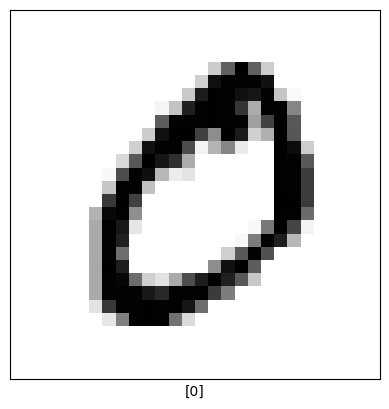

In [19]:
# Show one of the images from the training dataset
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[1]])
plt.imshow(x_train[1],cmap=plt.cm.binary)

In [20]:
# Normalize the pixel values to the range [0, 1]

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape image channel for greyscale

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)



In [21]:
# Augment the data to bring diversity to the dataset and basically make a shit ton more
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

datagen.fit(x_train)

In [22]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 32)         

In [23]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [24]:
x_train = x_train.reshape(-1,28, 28,1)#Reshape for CNN
x_test = x_test.reshape(-1,28, 28, 1)


In [25]:
model_log=model.fit(x_train, y_train,
          batch_size=60,
          epochs=10,
          verbose=1,
          validation_split=.3)
#shit gpu 90+ % on google collab

Epoch 1/10
700/700 [==============================] - 5s 5ms/step - loss: 0.4125 - accuracy: 0.8669 - val_loss: 0.1060 - val_accuracy: 0.9673
Epoch 2/10
700/700 [==============================] - 3s 5ms/step - loss: 0.1500 - accuracy: 0.9531 - val_loss: 0.0716 - val_accuracy: 0.9786
Epoch 3/10
700/700 [==============================] - 3s 5ms/step - loss: 0.1112 - accuracy: 0.9651 - val_loss: 0.0578 - val_accuracy: 0.9821
Epoch 4/10
700/700 [==============================] - 4s 6ms/step - loss: 0.0915 - accuracy: 0.9716 - val_loss: 0.0521 - val_accuracy: 0.9836
Epoch 5/10
700/700 [==============================] - 3s 5ms/step - loss: 0.0805 - accuracy: 0.9753 - val_loss: 0.0465 - val_accuracy: 0.9861
Epoch 6/10
700/700 [==============================] - 4s 5ms/step - loss: 0.0731 - accuracy: 0.9769 - val_loss: 0.0463 - val_accuracy: 0.9855
Epoch 7/10
700/700 [==============================] - 3s 5ms/step - loss: 0.0682 - accuracy: 0.9775 - val_loss: 0.0408 - val_accuracy: 0.9876
Epoch 

In [26]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9900000095367432


In [27]:
predictions = model.predict(x_test)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([2.2353443e-10, 2.2738895e-08, 1.9164386e-06, 7.8207131e-06,
       2.6851850e-12, 6.8424134e-11, 3.4208376e-16, 9.9998939e-01,
       7.6366211e-09, 8.3722603e-07], dtype=float32)

In [28]:
np.argmax(predictions[0])

7

In [29]:
x_test = x_test.reshape(-1,28, 28)
x_test.shape

(10000, 28, 28)

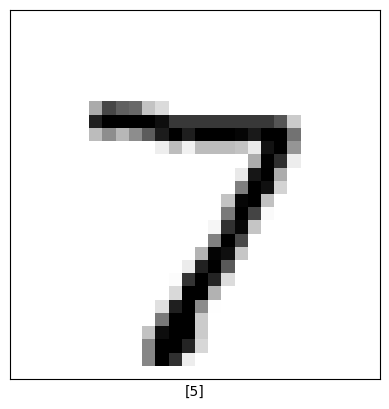

In [30]:
# Show one of the images from the test dataset
plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[0]])
plt.imshow(x_test[0],cmap=plt.cm.binary)


In [31]:
def plot_image(i, predictions_array, true_label, img):
    plt.imshow(img[i], cmap=plt.cm.binary)
    plt.xlabel(f"{np.argmax(predictions_array[i])} {100*np.max(predictions_array[i]):2.0f}% ({true_label[i]})", color=('blue' if np.argmax(predictions_array[i]) == true_label[i] else 'red'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

def plot_value_array(i, predictions_array, true_label):
    plt.bar(range(10), predictions_array[i], color="#777777")
    plt.ylim([0, 1])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.gca().get_children()[np.argmax(predictions_array[i])].set_color('red')
    plt.gca().get_children()[true_label[i]].set_color('blue')


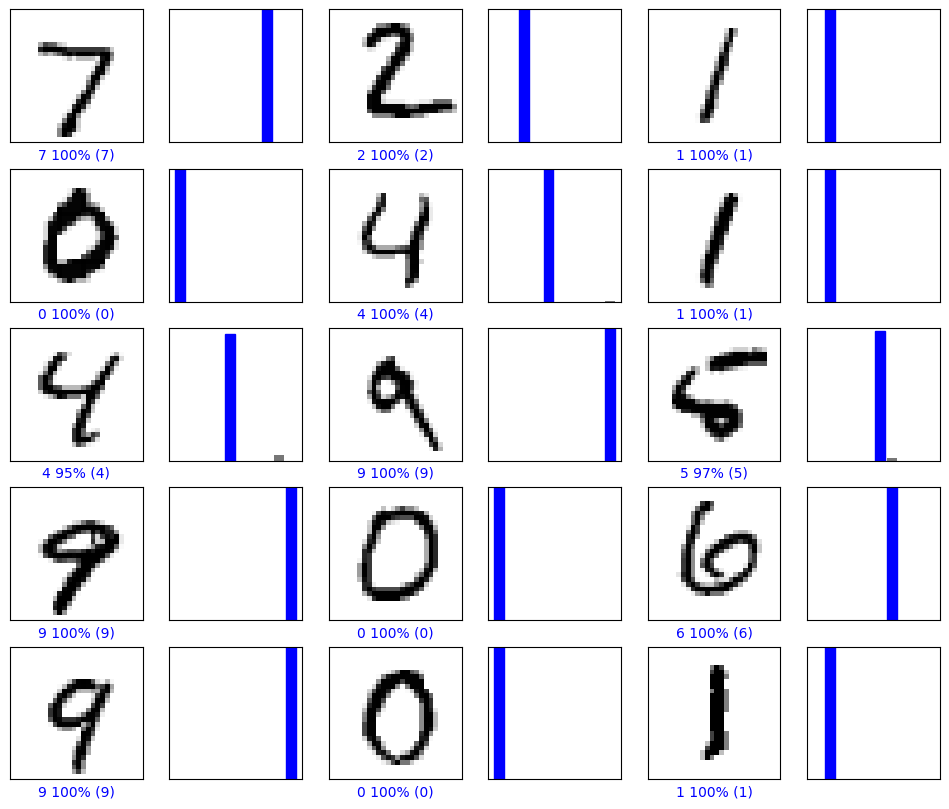

In [32]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()